In [1]:
# Utilisation de la méthode Support Vector Machine 
import pandas as pd
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 

In [2]:
df_cct = pd.read_parquet("/home/onyxia/work/df_all.parquet")

In [3]:
# Pour "Use Chip":

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Use Chip"]]).toarray()

features_labels = np.hstack(np.array(enc.categories_))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [5]:
# Pour "day_of_week" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["day_of_week"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [6]:
# Pour "Card Brand" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Brand"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [7]:
# Pour "Card Type" : 

enc = OneHotEncoder(handle_unknown='ignore')

features_array = enc.fit_transform(df_cct[["Card Type"]]).toarray()

features_labels = np.hstack(np.array(enc.get_feature_names_out()))

df_cct = pd.concat([df_cct, pd.DataFrame(features_array, columns = features_labels)], axis = 1)

In [4]:
df_cct.columns.values

array(['User', 'Card', 'Month', 'Day', 'Hours', 'Amount', 'Use Chip',
       'Card Brand', 'Card Type', 'Credit Limit', 'year_diff',
       'delta_t_s', 'delta_t_s_card', 'day_of_week', 'amt/daily_income',
       'Retired', 'daily_amount', 'nb_daily_declines_card',
       'nb_weekly_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Is Fraud?',
       'Chip Transaction', 'Online Transaction', 'Swipe Transaction'],
      dtype=object)

In [4]:
# All variables without cards and some encoded variables (day of week, card brand and card type) 
selection = ['Month', 'Day', 'Hours', 'Amount','Credit Limit', 'year_diff',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income',
       'Retired', 'daily_amount', 'nb_daily_declines_card',
       'nb_weekly_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt', 'Is Fraud?',
       'Chip Transaction', 'Online Transaction', 'Swipe Transaction']

In [5]:
# Selection without "Is Fraud?"
estimators = ['Month', 'Day', 'Hours', 'Amount','Credit Limit', 'year_diff',
       'delta_t_s', 'delta_t_s_card', 'amt/daily_income',
       'Retired', 'daily_amount', 'nb_daily_declines_card',
       'nb_weekly_declines_card', 'nb_monthly_declines_card', 'bad_pin',
       'insufficient_balance', 'hr_nbt/last_30d_av_hr_nbt',
       'day_nbt/last_30d_av_day_nbt', 'last_3d_amt/nbt',
       'Chip Transaction', 'Online Transaction', 'Swipe Transaction']

In [6]:
# New dataframe with only 500000 random transactions including all frauds 

fraud_df = df_cct[df_cct['Is Fraud?'] == 1]
nb_fraud = len(fraud_df)
no_fraud_df = df_cct[df_cct['Is Fraud?'] == 0].sample(n=500000-nb_fraud, random_state=42)
new_df = pd.concat([fraud_df, no_fraud_df])


In [7]:
df_selec = new_df[selection]
X = df_selec[estimators]
y = df_selec["Is Fraud?"]

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)

In [9]:
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [10]:
preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('std', RobustScaler(), ['year_diff', 'Month', 'Day', 'Hours', 'Amount',
       'Credit Limit',
       'delta_t_s', 'delta_t_s_card',
       'amt/daily_income', 'daily_amount',
       'nb_daily_declines_card', 'nb_weekly_declines_card',
       'nb_monthly_declines_card',
       'hr_nbt/last_30d_av_hr_nbt', 'day_nbt/last_30d_av_day_nbt',
       'last_3d_amt/nbt'])
        ])

In [11]:
svm_classifier = Pipeline(steps = [('pr', preprocessor), ('svm', SVC())])

In [12]:
svm_classifier.fit(X_train, y_train)

Pipeline(steps=[('pr',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('std', RobustScaler(),
                                                  ['year_diff', 'Month', 'Day',
                                                   'Hours', 'Amount',
                                                   'Credit Limit', 'delta_t_s',
                                                   'delta_t_s_card',
                                                   'amt/daily_income',
                                                   'daily_amount',
                                                   'nb_daily_declines_card',
                                                   'nb_weekly_declines_card',
                                                   'nb_monthly_declines_card',
                                                   'hr_nbt/last_30d_av_hr_nbt',
                                                   'day_nbt/last_30d_av_day_nbt',
                                                   'last_3d_amt/nbt'])])),
                ('svm', SVC())])

In [13]:
y_pred = svm_classifier.predict(X_test)

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

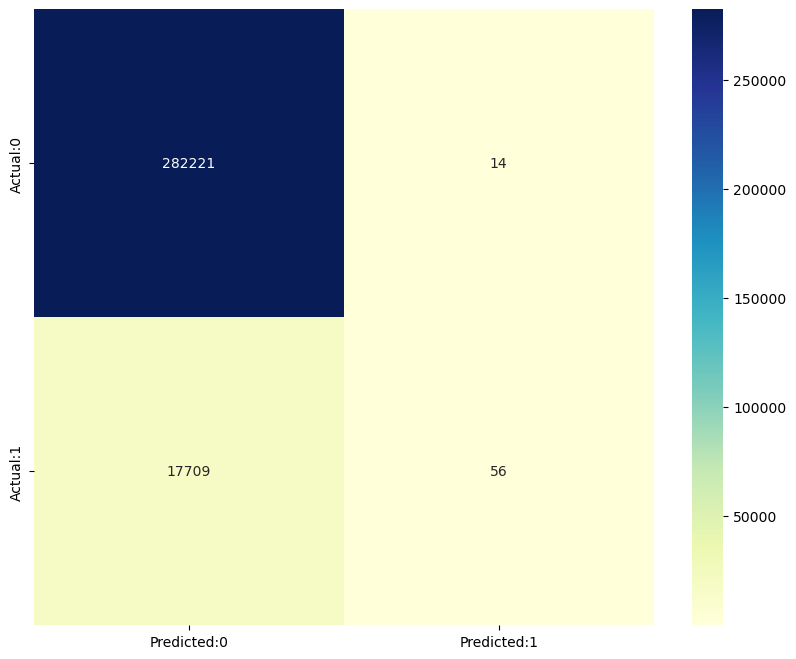

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");